In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Ruta al archivo CSV
archivo_csv = "diabetes.csv"

# Leer el archivo CSV utilizando Pandas
datos = pd.read_csv(archivo_csv)


selected_columns = ['Glucose','BloodPressure', 'SkinThickness', 'Insulin','BMI']  # Add your desired column names

for col in selected_columns:
    # Calculate the mean of non-zero values in the column
    mean_val = datos.loc[datos[col] != 0, col].mean()
   

    # Replace 0 values with the mean
    datos[col] = datos[col].replace(0, mean_val)



# Análisis del dataset

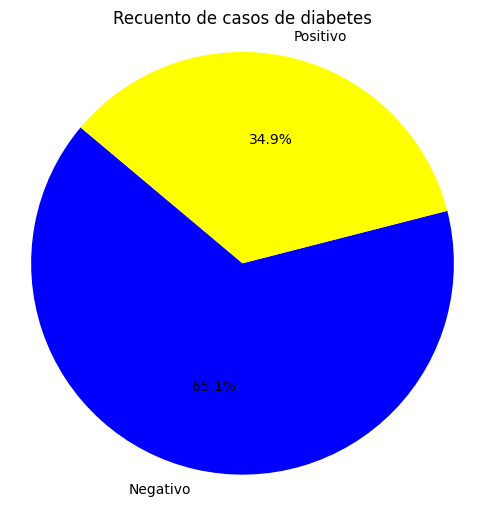

In [37]:
# Contar el número de ceros y unos en la columna 'Columna'
counts = datos['Outcome'].value_counts()

# Gráfico de pastel
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=['Negativo', 'Positivo'], colors=['blue', 'yellow'], autopct='%1.1f%%', startangle=140)
plt.title('Recuento de casos de diabetes')
plt.axis('equal')  # Ajustar el aspecto del círculo
plt.show()

# Análisis de features

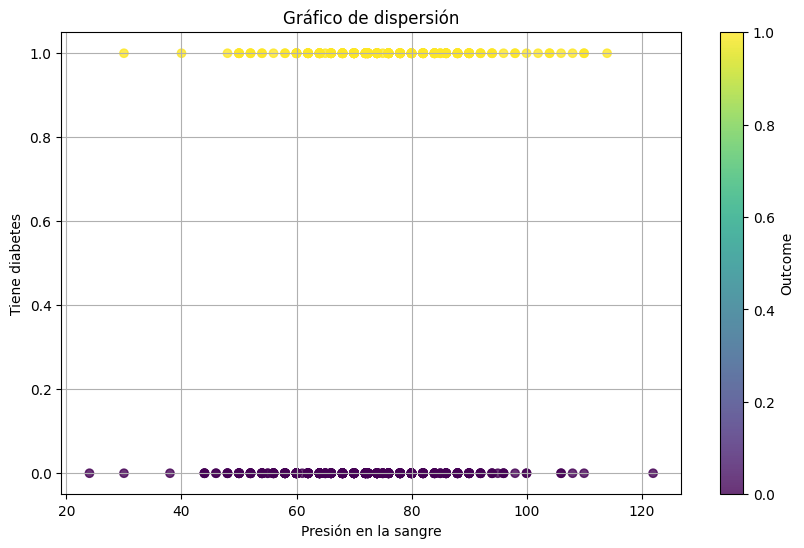

In [38]:
import numpy as np
import matplotlib.pyplot as plt


# Gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(datos['BloodPressure'], datos['Outcome'], c=datos['Outcome'], cmap='viridis', alpha=0.8)
plt.title('Gráfico de dispersión')
plt.xlabel('Presión en la sangre')
plt.ylabel('Tiene diabetes')
plt.colorbar(label='Outcome')
plt.grid(True)
plt.show()

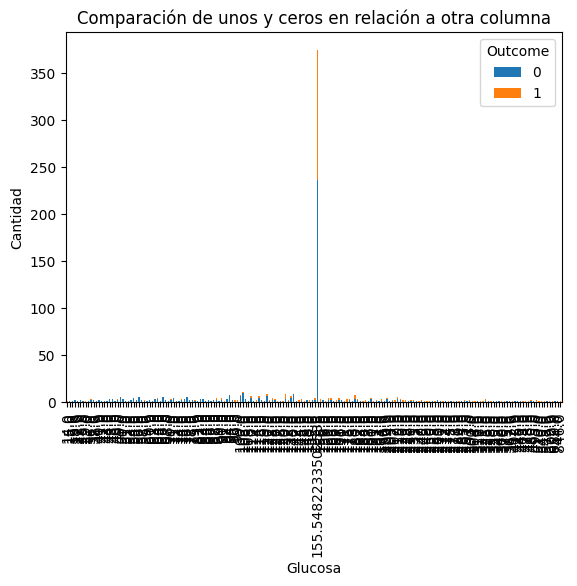

In [39]:
# Contar los valores de 'columna2' para cada valor único en 'columna1'
counts = datos.groupby('Insulin')['Outcome'].value_counts().unstack().fillna(0)

# Graficar los valores
counts.plot(kind='bar', stacked=True)
plt.xlabel('Glucosa')
plt.ylabel('Cantidad')
plt.title('Comparación de unos y ceros en relación a otra columna')
plt.legend(title='Outcome')
plt.show()

En el gráfico anterior se puede apreciar una ligera disminución de personas con diabetes con la presión baja y un ligero incremento de personas con diabetes con la presión alta.

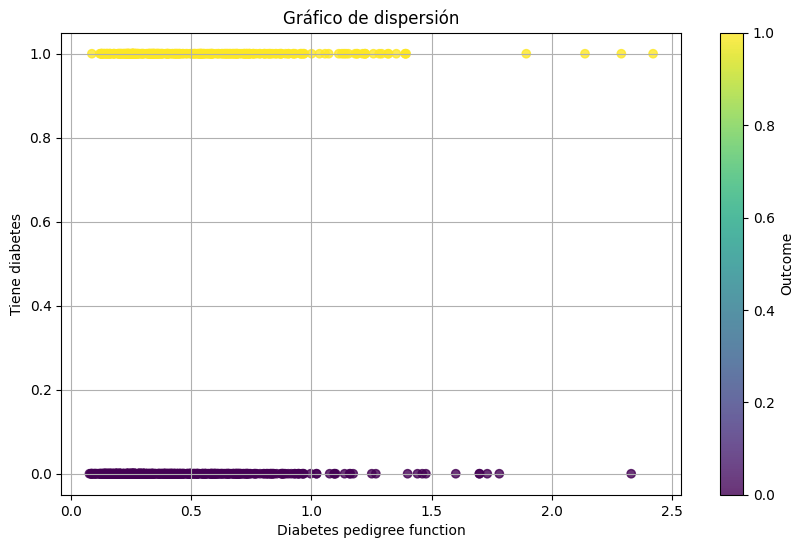

In [40]:
# Gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(datos['DiabetesPedigreeFunction'], datos['Outcome'], c=datos['Outcome'], cmap='viridis', alpha=0.8)
plt.title('Gráfico de dispersión')
plt.xlabel('Diabetes pedigree function')
plt.ylabel('Tiene diabetes')
plt.colorbar(label='Outcome')
plt.grid(True)
plt.show()

Ambiguo, realmente no se puede interpretar algun comportamientos que nos ayude a predecir si una persona tiene o no diabetes.

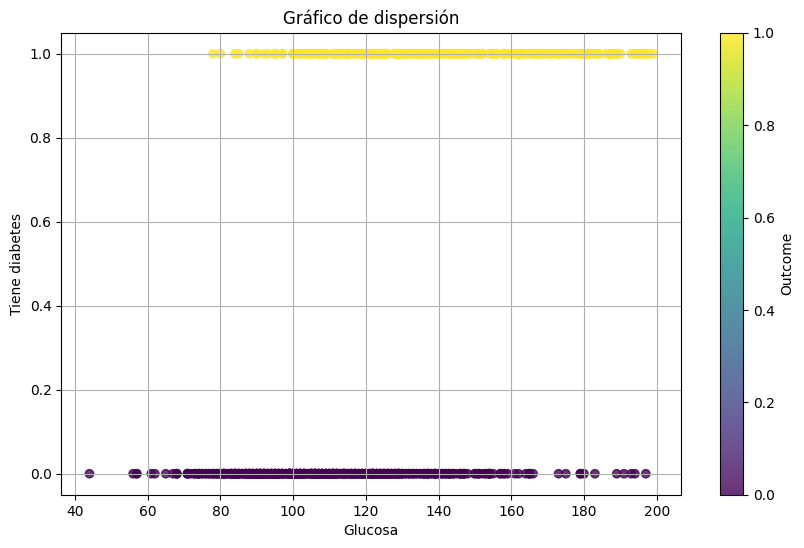

In [41]:
# Gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(datos['Glucose'], datos['Outcome'], c=datos['Outcome'], cmap='viridis', alpha=0.8)
plt.title('Gráfico de dispersión')
plt.xlabel('Glucosa')
plt.ylabel('Tiene diabetes')
plt.colorbar(label='Outcome')
plt.grid(True)
plt.show()

Similar al gráfico de la presión en la sangre pero acá es más marcado la diminución en niveles bajos y un ligero incremento en niveles altos, esta parece la mejor feature.

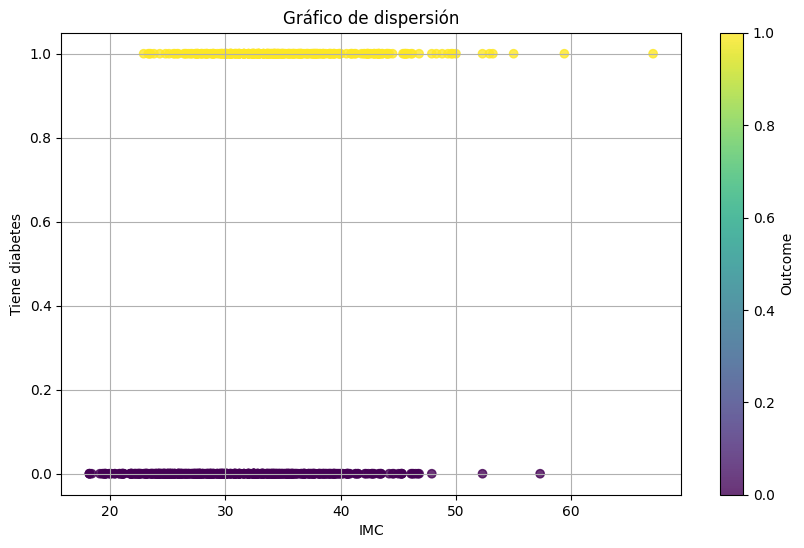

In [42]:
# Gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(datos['BMI'], datos['Outcome'], c=datos['Outcome'], cmap='viridis', alpha=0.8)
plt.title('Gráfico de dispersión')
plt.xlabel('IMC')
plt.ylabel('Tiene diabetes')
plt.colorbar(label='Outcome')
plt.grid(True)
plt.show()

Igual que el gráfico de la glucosa, este feature es un buen canditado también.

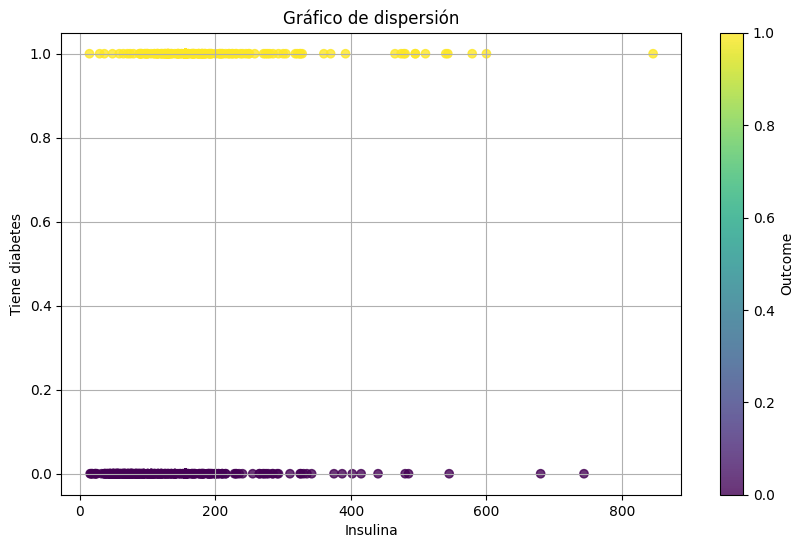

In [43]:
# Gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(datos['Insulin'], datos['Outcome'], c=datos['Outcome'], cmap='viridis', alpha=0.8)
plt.title('Gráfico de dispersión')
plt.xlabel('Insulina')
plt.ylabel('Tiene diabetes')
plt.colorbar(label='Outcome')
plt.grid(True)
plt.show()

Ambiguo

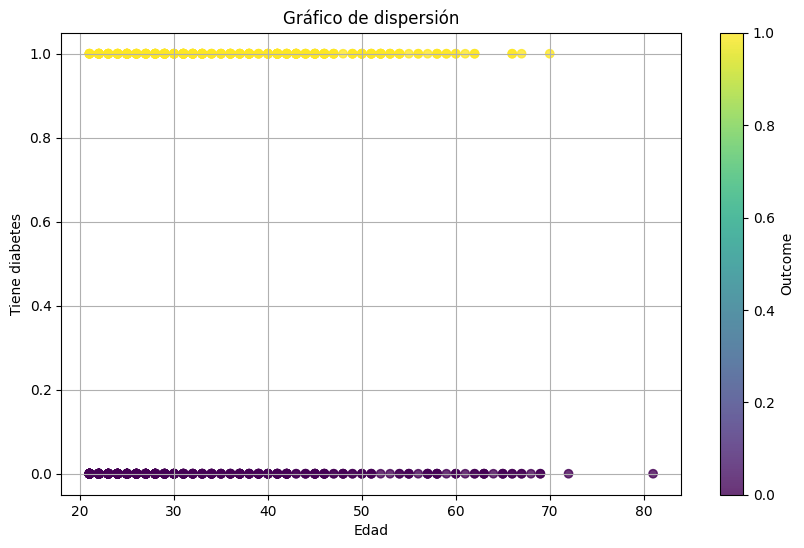

In [44]:
# Gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(datos['Age'], datos['Outcome'], c=datos['Outcome'], cmap='viridis', alpha=0.8)
plt.title('Gráfico de dispersión')
plt.xlabel('Edad')
plt.ylabel('Tiene diabetes')
plt.colorbar(label='Outcome')
plt.grid(True)
plt.show()

Ambiguo

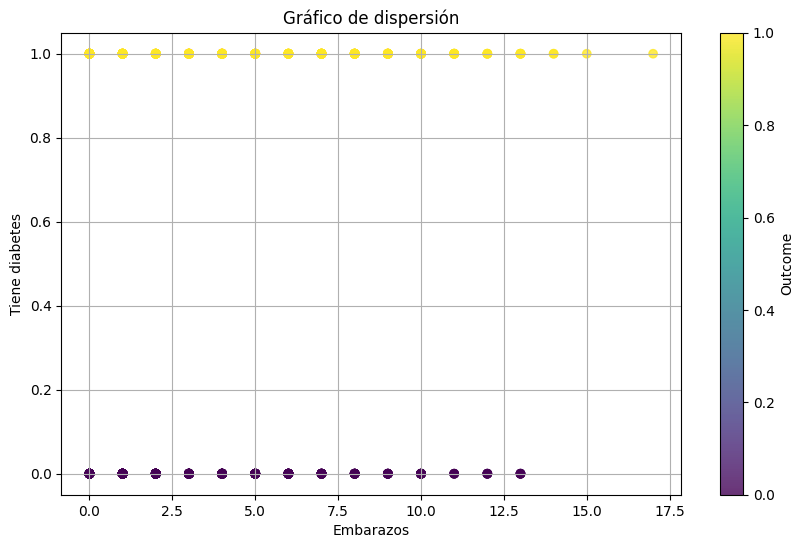

In [45]:
# Gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(datos['Pregnancies'], datos['Outcome'], c=datos['Outcome'], cmap='viridis', alpha=0.8)
plt.title('Gráfico de dispersión')
plt.xlabel('Embarazos')
plt.ylabel('Tiene diabetes')
plt.colorbar(label='Outcome')
plt.grid(True)
plt.show()

Ambiguo

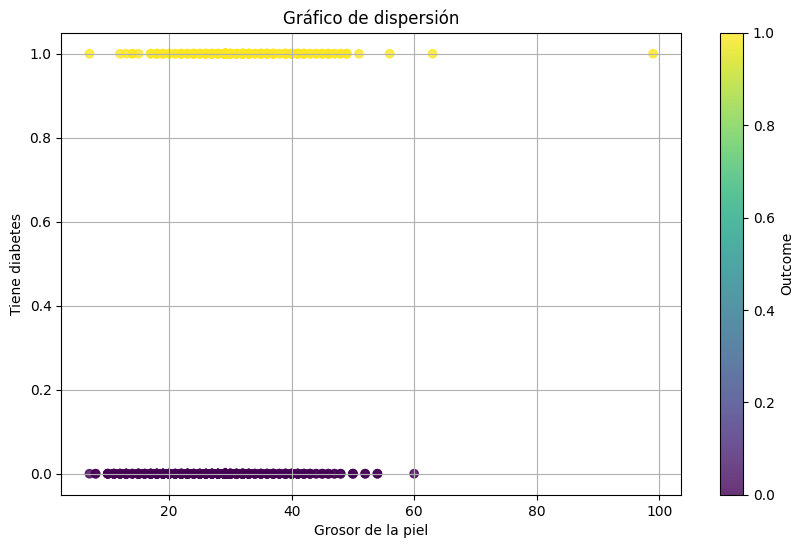

In [46]:
# Gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(datos['SkinThickness'], datos['Outcome'], c=datos['Outcome'], cmap='viridis', alpha=0.8)
plt.title('Gráfico de dispersión')
plt.xlabel('Grosor de la piel')
plt.ylabel('Tiene diabetes')
plt.colorbar(label='Outcome')
plt.grid(True)
plt.show()

Pareciera haber un comportamiento similar al gráfico de la presión en la sangre.

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = datos[["Glucose","BMI","BloodPressure","SkinThickness","Pregnancies","Insulin","DiabetesPedigreeFunction"]]
y = datos['Outcome']

# Dividir los datos en conjuntos de entrenamiento y prueba (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=datos["Outcome"])


solvers_l1=["liblinear","saga"]
solvers_l2=["liblinear","newton-cg","lbfgs","sag"]

for elemento in solvers_l1:

    #Incializar el modelo
    model = LogisticRegression(penalty="l1", solver=elemento)

    # Entrenar el modelo de regresión logística
    model.fit(X_train, y_train)
    
    # Predecir en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Evaluar el rendimiento del modelo
    print("Resultados del modelo con penalty l1 y solver: ", elemento)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred), "\n")

for elemento in solvers_l2:

    #Incializar el modelo
    model = LogisticRegression(penalty="l2",solver=elemento)

    # Entrenar el modelo de regresión logística
    model.fit(X_train, y_train)
    
    # Predecir en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Evaluar el rendimiento del modelo
    print("Resultados del modelo con penalty l2 y solver: ", elemento)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred), "\n")

Resultados del modelo con penalty l1 y solver:  liblinear
Accuracy: 0.6753246753246753

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.79      0.76       100
           1       0.54      0.46      0.50        54

    accuracy                           0.68       154
   macro avg       0.64      0.63      0.63       154
weighted avg       0.67      0.68      0.67       154


Confusion Matrix:
[[79 21]
 [29 25]] 

Resultados del modelo con penalty l1 y solver:  saga
Accuracy: 0.7142857142857143

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.90      0.80       100
           1       0.67      0.37      0.48        54

    accuracy                           0.71       154
   macro avg       0.70      0.64      0.64       154
weighted avg       0.71      0.71      0.69       154


Confusion Matrix:
[[90 10]
 [34 20]] 

Resultados del modelo con penalty l2 y solver:  l

C:\Users\Tony\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Tony\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Tony\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Pyth

# Pruebas con datos normalizados

In [64]:
from sklearn.preprocessing import MinMaxScaler

# Inicializar el objeto MinMaxScaler
scaler = MinMaxScaler()

# Seleccionar las características a normalizar (por ejemplo, todas las columnas)
features_to_normalize = datos.columns.difference(["Outcome"])

datos_normalizados=pd.DataFrame(scaler.fit_transform(datos[features_to_normalize]), columns=features_to_normalize)

datos_normalizados["Outcome"]=datos["Outcome"]


for elemento in solvers_l1:

    #Incializar el modelo
    model = LogisticRegression(penalty="l1",solver=elemento)

    # Entrenar el modelo de regresión logística
    model.fit(X_train, y_train)
    
    # Predecir en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Evaluar el rendimiento del modelo
    print("Resultados del modelo con penalty l1 y solver: ", elemento)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred), "\n")

for elemento in solvers_l2:

    #Incializar el modelo
    model = LogisticRegression(penalty="l2",solver=elemento)

    # Entrenar el modelo de regresión logística
    model.fit(X_train, y_train)
    
    # Predecir en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Evaluar el rendimiento del modelo
    print("Resultados del modelo con penalty l2 y solver: ", elemento)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred), "\n")   

Resultados del modelo con penalty l1 y solver:  liblinear
Accuracy: 0.6753246753246753

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.79      0.76       100
           1       0.54      0.46      0.50        54

    accuracy                           0.68       154
   macro avg       0.64      0.63      0.63       154
weighted avg       0.67      0.68      0.67       154


Confusion Matrix:
[[79 21]
 [29 25]] 

Resultados del modelo con penalty l1 y solver:  saga
Accuracy: 0.7142857142857143

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.90      0.80       100
           1       0.67      0.37      0.48        54

    accuracy                           0.71       154
   macro avg       0.70      0.64      0.64       154
weighted avg       0.71      0.71      0.69       154


Confusion Matrix:
[[90 10]
 [34 20]] 

Resultados del modelo con penalty l2 y solver:  l

C:\Users\Tony\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Tony\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Tony\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Pyth